# Computer Vision Using Image Classification

Fashion-MNIST is a dataset of Zalando's article images. This guide uses the Fashion MNIST dataset which contains 60,000 grayscale images in 10 categories. The images show individual articles of clothing at 28 by 28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents as follows:

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

Dataset Source: https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The labels 2 to 9 correspond to each fashion items. 
Why the pixels of 1 to 785 correspond to grid scales which made up a single fashion item. 
The intensities are the figures under all pixels which corresponding to a single item . This range from 1 to 255

In [4]:
fashion_mnist_df.shape

(60000, 785)

We would only use a fraction of the entire dataset for this exercise.

In [5]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

fashion_mnist_df.head()

In [7]:
LOOKUP = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'Pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal', 
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag', 
          9: 'Ankle boot'}

We attached actual labels (items) to code 1 to 9.

In [8]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

We will use our features (pixels) to determine actual labels (items). The plt.imshow print out a single image in 28 by 28 which comprises of the 785 grid scales as seen earlier.

In [10]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

For X, Put all the columns in our dataset into 'X' without the first column (item label). This act as our model features.

For the Y, put only the fashion item labels to train our model.

In [11]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,1,0,0,118,218,...,194,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,16,43,...,0,0,1,1,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,134,31,0,4,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
Y.head()

0    3
1    2
2    4
3    8
4    3
Name: label, dtype: int64

View the first 100 pixels for index 5.

In [13]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   2,   2,   1,   0,   0, 149,
       147, 162, 156, 178,  10,   0,   1,   2,   1,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   0,
       145, 251, 250, 228, 247, 252, 192,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  59,
       155, 236, 225, 216, 246, 218, 242, 222, 221, 230, 146,  56,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52,
       199, 230, 234, 216, 209, 222, 235, 254, 232], dtype=int64)

In [14]:
Y.loc[5]

2

showing that index number 5 correspond to item 2

Actual label:  Pullover


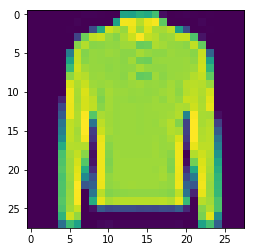

In [15]:
display_image(X.loc[5].values, Y.loc[5])

The item 2 on index 5 is actually a Pullover Cloth!

In [25]:
X.loc[567].values[:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16862745, 0.96078431, 0.54117647, 0.49019608,
       0.74901961, 0.79607843, 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.00392157, 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.01568627, 0.50588235, 0.89803922,
       0.64705882, 0.64705882, 0.64705882, 0.79215686, 0.72156863,
       0.49019608, 0.29803922, 0.        , 0.        , 0.        ,
       0.        , 0.00784314, 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.14509804, 0.41176471,
       0.70980392, 0.74509804, 0.77254902, 0.75686275, 0.89019608,
       0.81568627, 0.95686275, 0.63529412, 0.37254902, 0.59607

In [27]:
Y.loc[567]

6

Actual label:  Shirt


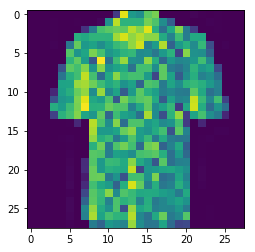

In [16]:
display_image(X.loc[567].values, Y.loc[567])

In [ ]:
Note all the images are 28 by 28.

Actual label:  Coat


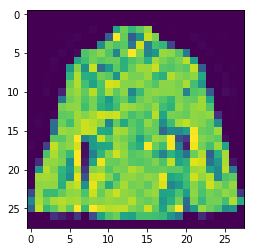

In [17]:
display_image(X.loc[15088].values, Y.loc[15088])

Now i would scale my numeric data to only intensity between 0 and 1. 
I would divide each of my pixel with 255 max. number of intensity.

In [18]:
X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.462745,0.854902,...,0.760784,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.062745,0.168627,...,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.525490,0.121569,0.000000,0.015686,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Now we will split our data into train and test set. Use 80% to train and 20% to test the accuracy of our model.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

We would use 14400 data to train our model.

In [21]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

We would use 3600 data to test our model.

In [22]:
def summarize_classification(y_test, 
                             y_pred, 
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

Set how the ouput classification will be summarized.

# Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.


In [23]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

Now use the model to predict our x test data

In [28]:
y_pred = logistic_model.predict(x_test)

y_pred

array([5, 1, 3, ..., 5, 8, 9], dtype=int64)

In [29]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  3010
accuracy_score :  0.8361111111111111
precision_score :  0.8349703417375518
recall_score :  0.8361111111111111


Compare how well our model y_test matches the one predicted now by our model (y_pred)

In [30]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(20)

,y_test,y_pred
16647,6,6
2291,6,0
12501,0,0
929,0,0
17269,4,4
8410,8,8
538,5,5
4341,0,0
17586,7,7
15356,4,4
